In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
df = pd.read_csv('data/traffic_dataset_with_trend.csv')
print(df.shape)
print(df["Timestamp"].min(), df["Timestamp"].max())
df.head()

(8736, 4)
2023-01-01 00:00:00 2023-12-30 23:00:00


,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0


# 🚦 Description du Jeu de Données de Trafic Routier

Le jeu de données de **trafic routier** contient des informations détaillées sur le volume de trafic horaire autour de Paris. Il couvre la période du **1er janvier 2023 au 31 décembre 2023**, avec des enregistrements effectués toutes les heures, pour un total de **8 736 observations**.

Ces données sont précieuses pour analyser les tendances du trafic, identifier des schémas saisonniers et évaluer l'impact des conditions météorologiques ou d’événements spécifiques.

---

## 📋 **Format des Données**

Le fichier est au format **CSV**, avec des valeurs séparées par des virgules.  
Les **valeurs manquantes** sont rares mais doivent être prises en compte lors de l'analyse.

---

## 🗂️ **Variables du Jeu de Données**

La base de données est composée de **4 variables principales** :

- **`Timestamp`** :  
  - *Type* : Date et Heure (format `YYYY-MM-DD HH:MM:SS`)  
  - *Description* : L'horodatage de chaque observation, indiquant la date et l'heure exactes de la mesure du trafic.

- **`Weather`** :  
  - *Type* : Catégoriel (Clear, Cloudy, Rain, Snow, etc.)  
  - *Description* : La condition météorologique au moment de la mesure, pouvant influencer le volume de trafic.

- **`Events`** :  
  - *Type* : Booléen (`True` / `False`)  
  - *Description* : Indique la présence (`True`) ou l'absence (`False`) d’un événement particulier (manifestations, travaux, etc.) susceptible d’affecter le trafic.

- **`Traffic Volume`** :  
  - *Type* : Numérique (float)  
  - *Unité* : Nombre de véhicules par heure  
  - *Description* : Le volume de trafic observé à l'heure spécifiée.

---

## ⚠️ **Traitement Préliminaire des Données**

Avant l’analyse :
- **Conversion des dates** : Transformation de la colonne `Timestamp` en format datetime pour faciliter l'analyse temporelle.
- **Vérification des valeurs manquantes** : Imputation ou suppression des données manquantes selon le contexte.
- **Encodage des variables catégorielles** : Transformation des colonnes `Weather` et `Events` pour les modèles de machine learning.

---

## 🎯 **Objectifs de l'Analyse**

1. **Identifier des tendances et des schémas saisonniers** du volume de trafic.
2. **Analyser l'impact des conditions météorologiques et des événements** sur la circulation.
3. **Prévoir le volume de trafic futur** à l'aide de modèles de séries temporelles et de techniques de machine learning.

---

Ce dataset offre une base solide pour explorer la dynamique du trafic urbain et développer des modèles prédictifs robustes. 🚀


In [5]:
df["Weather"].value_counts(normalize=True)

Weather
Clear     0.591117
Cloudy    0.309409
Rain      0.089057
Snow      0.010417
Name: proportion, dtype: float64

In [6]:
df["Events"].value_counts(normalize=True)

Events
False    0.899267
True     0.100733
Name: proportion, dtype: float64

### 🚦 Analyse du Volume de Trafic au Fil du Temps

- Le graphique montre des **pics réguliers** et des **baisses soudaines**, caractéristiques d'un trafic routier influencé par des schémas récurrents.
- On remarque des **fluctuations importantes** du volume de trafic sur l'ensemble de l'année, indiquant une forte variabilité.


Text(0.5, 1.0, 'Traffic Volume Over Time')

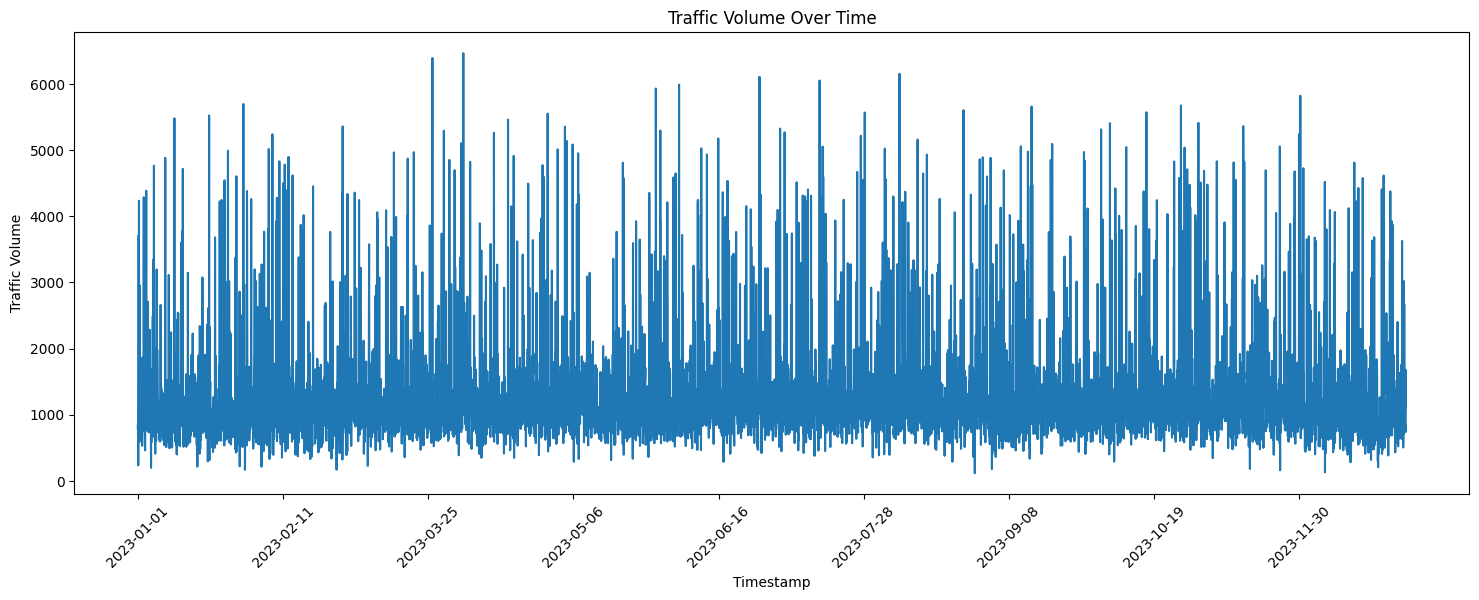

In [7]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df)
plt.xticks(ticks=df['Timestamp'][::1000], rotation=45)

plt.title('Traffic Volume Over Time')

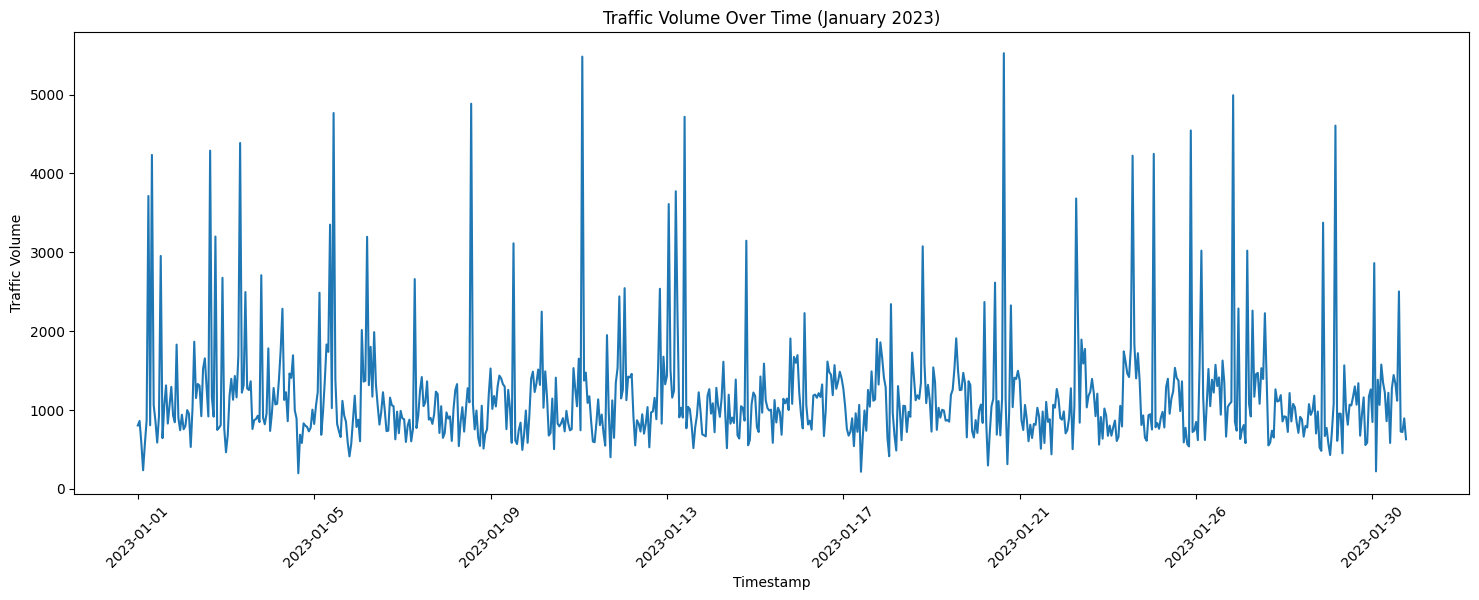

In [8]:
# Line plot for only a month
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df[df['Timestamp'] < '2023-01-31'])
plt.xticks(ticks=df[df['Timestamp'] < '2023-01-31']['Timestamp'][::100], rotation=45)

plt.title('Traffic Volume Over Time (January 2023)')
plt.show()

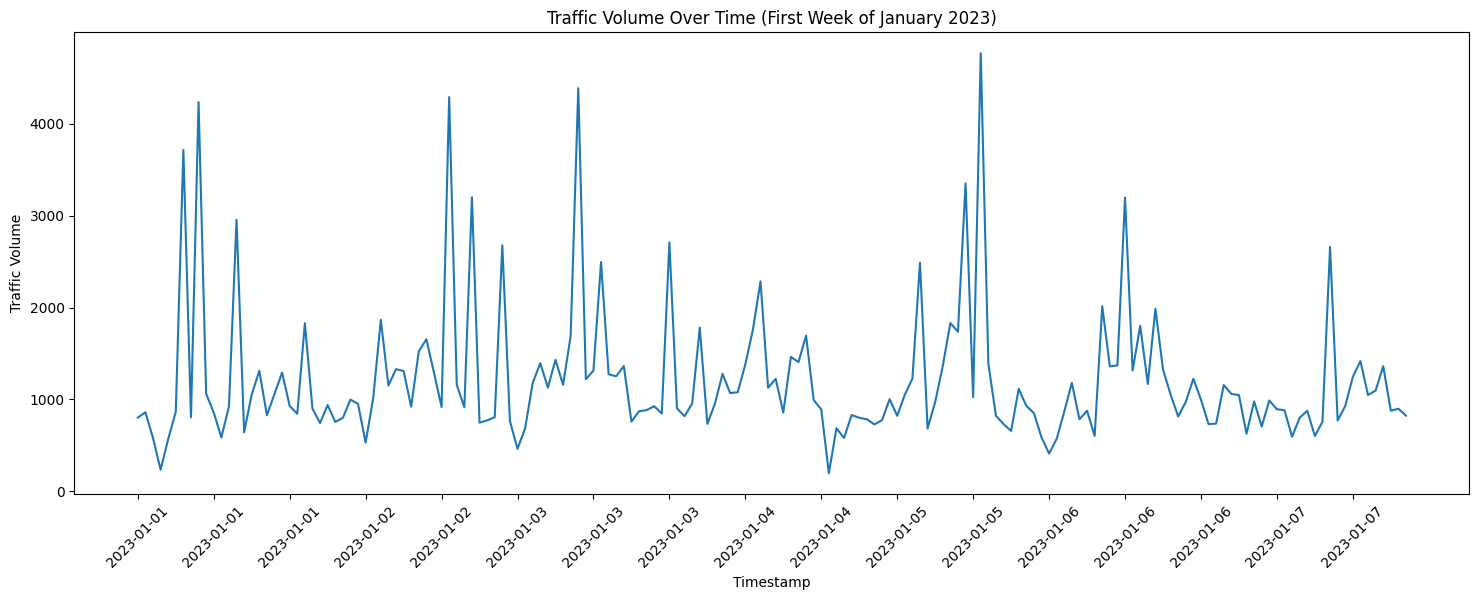

In [9]:
# Line plot for only a week
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-08')])
plt.xticks(ticks=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-08')]['Timestamp'][::10], rotation=45)

plt.title('Traffic Volume Over Time (First Week of January 2023)')
plt.show()


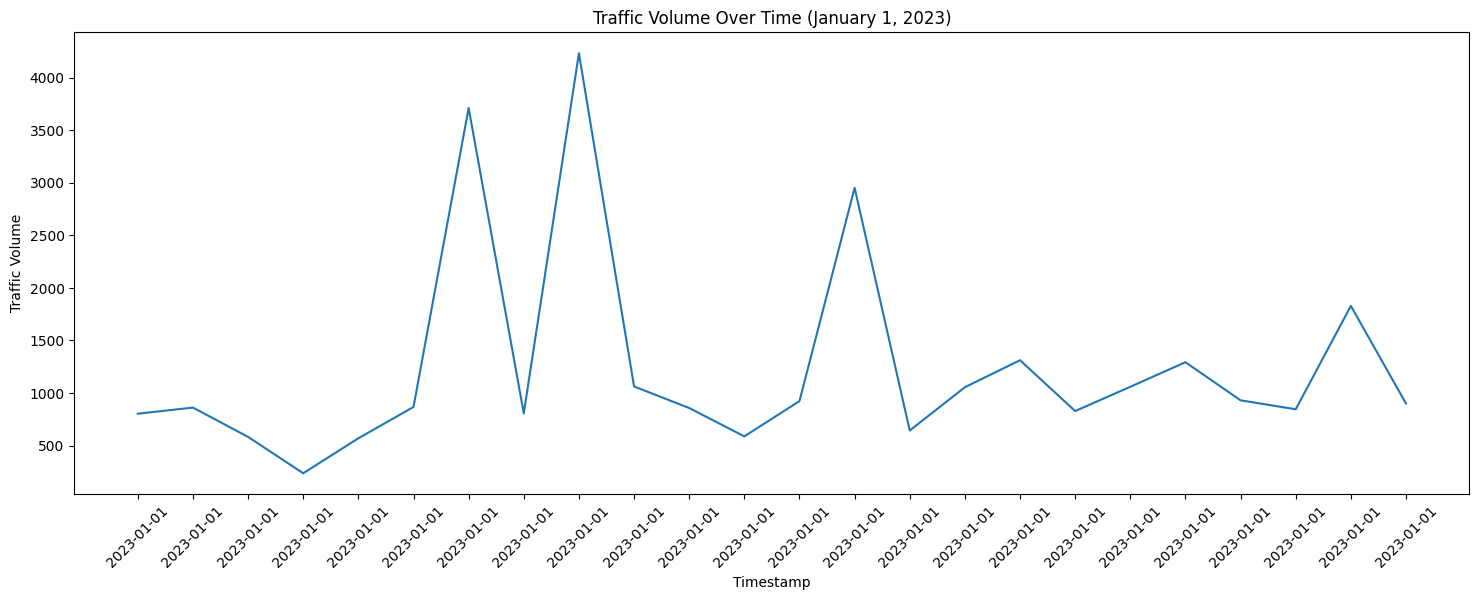

In [10]:
# Line plot for only a day
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-02')])
plt.xticks(ticks=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-02')]['Timestamp'][::1], rotation=45)

plt.title('Traffic Volume Over Time (January 1, 2023)')
plt.show()

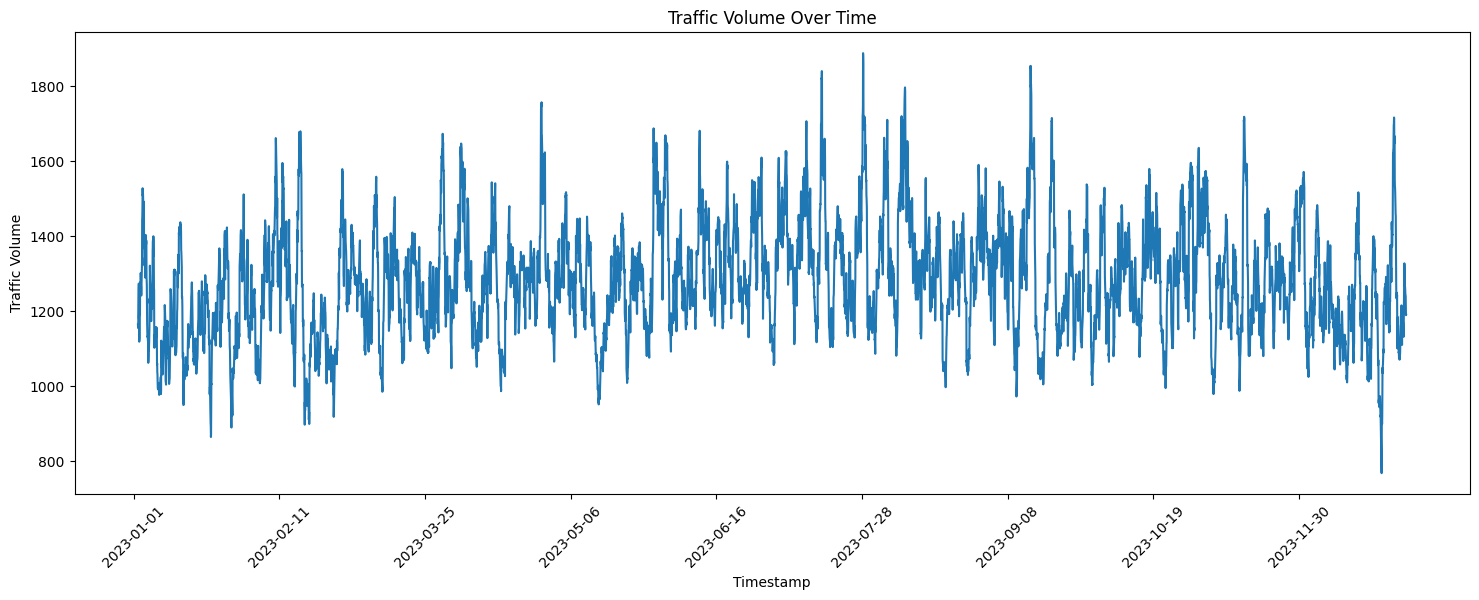

In [11]:
# smoothe data
plt.figure(figsize=(18, 6))
# Smooth the data using rolling mean
df['Traffic Volume'] = df['Traffic Volume'].rolling(window=30).mean()
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df,errorbar=None)
plt.xticks(ticks=df['Timestamp'][::1000], rotation=45)

plt.title('Traffic Volume Over Time')
plt.show()

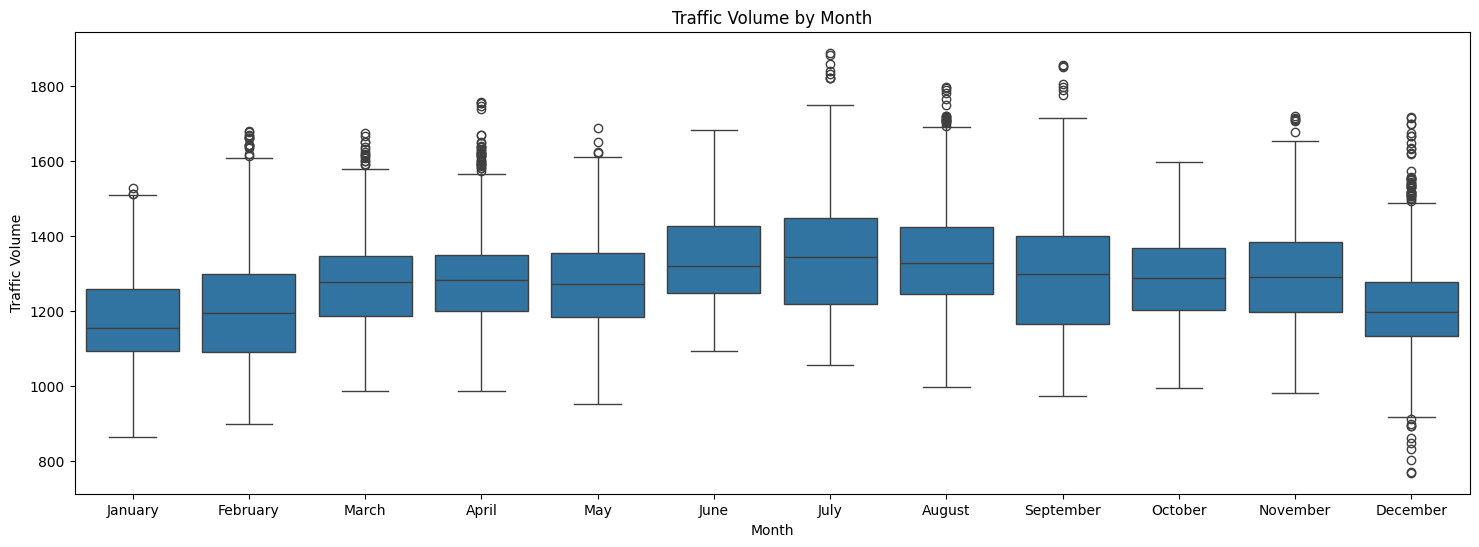

In [12]:
# box plot per month
df['Month'] = df['Timestamp'].dt.month_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='Traffic Volume', data=df)
plt.title('Traffic Volume by Month')
plt.show()

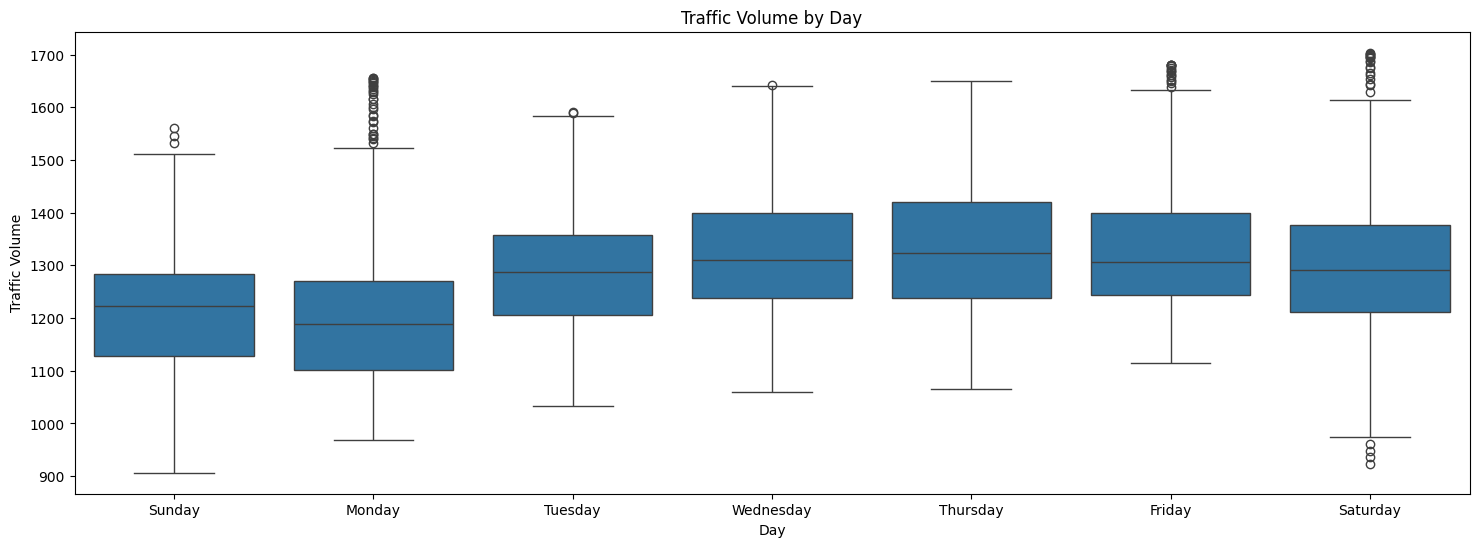

In [28]:
# box plot per day
df['Day'] = df['Timestamp'].dt.day_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Day', y='Traffic Volume', data=df)
plt.title('Traffic Volume by Day')
plt.show()

C:\Users\lbenzemma\AppData\Local\Temp\ipykernel_2432\519031725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Traffic Volume', data=df, palette='Set2')


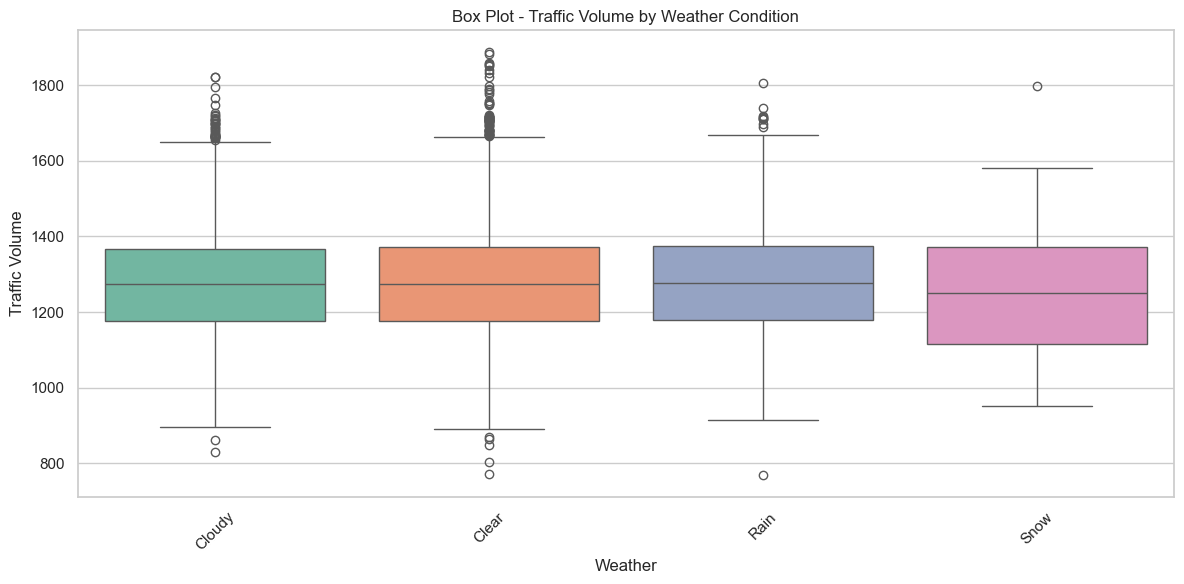

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Traffic Volume', data=df, palette='Set2')
plt.title('Box Plot - Traffic Volume by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

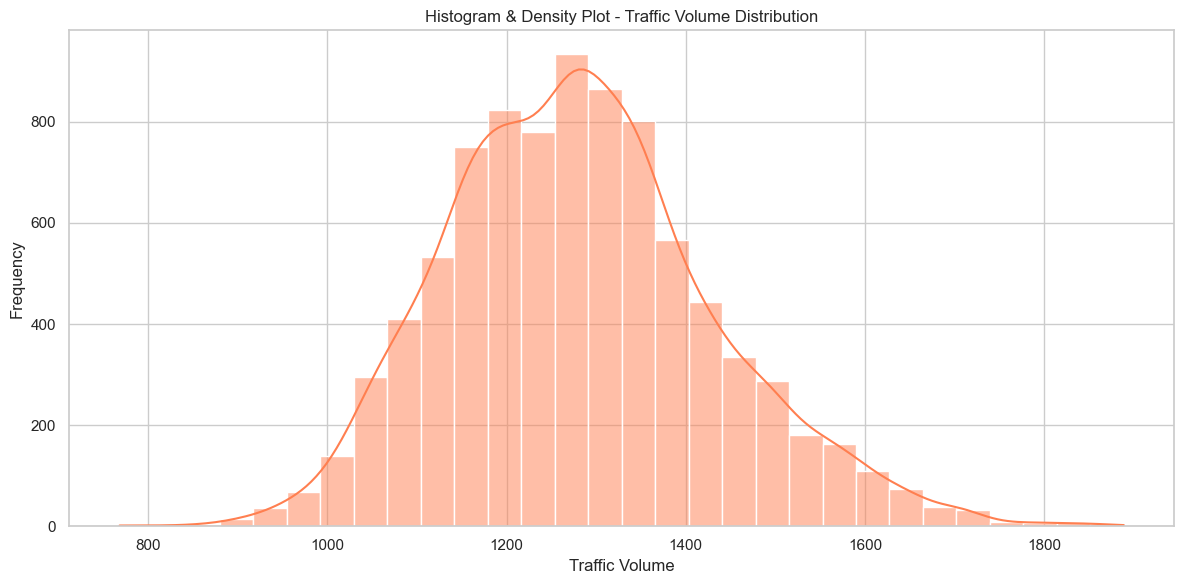

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Traffic Volume'], kde=True, color='coral', bins=30)
plt.title('Histogram & Density Plot - Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

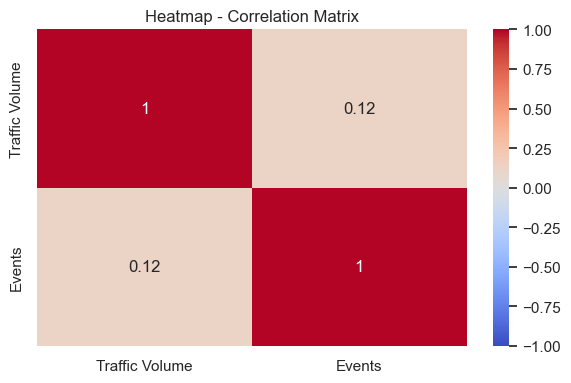

In [20]:
df['Events'] = df['Events'].astype(int)
corr = df[['Traffic Volume', 'Events']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap - Correlation Matrix')
plt.tight_layout()
plt.show()

### 📊 Analyse des Lag Scatter Plots

#### 🔹 Corrélation positive forte (Lags 1 à 4) :
- Les points forment un **alignement presque linéaire**, indiquant une forte **autocorrélation**.
- Cela signifie que le **volume de trafic actuel est fortement influencé par les volumes des heures précédentes**.
- Le trafic suit un **comportement assez prévisible à court terme**.

---

#### 🔸 Diminution progressive de la corrélation (à partir de Lag 5) :
- La **dispersion des points augmente légèrement**, bien que la corrélation reste visible.
---

#### 🔻 Patterns récurrents (Lags > 8) :
- Même avec des **retards plus longs**, on remarque des **structures cohérentes**, ce qui pourrait indiquer des **cycles journaliers ou hebdomadaires**.
---

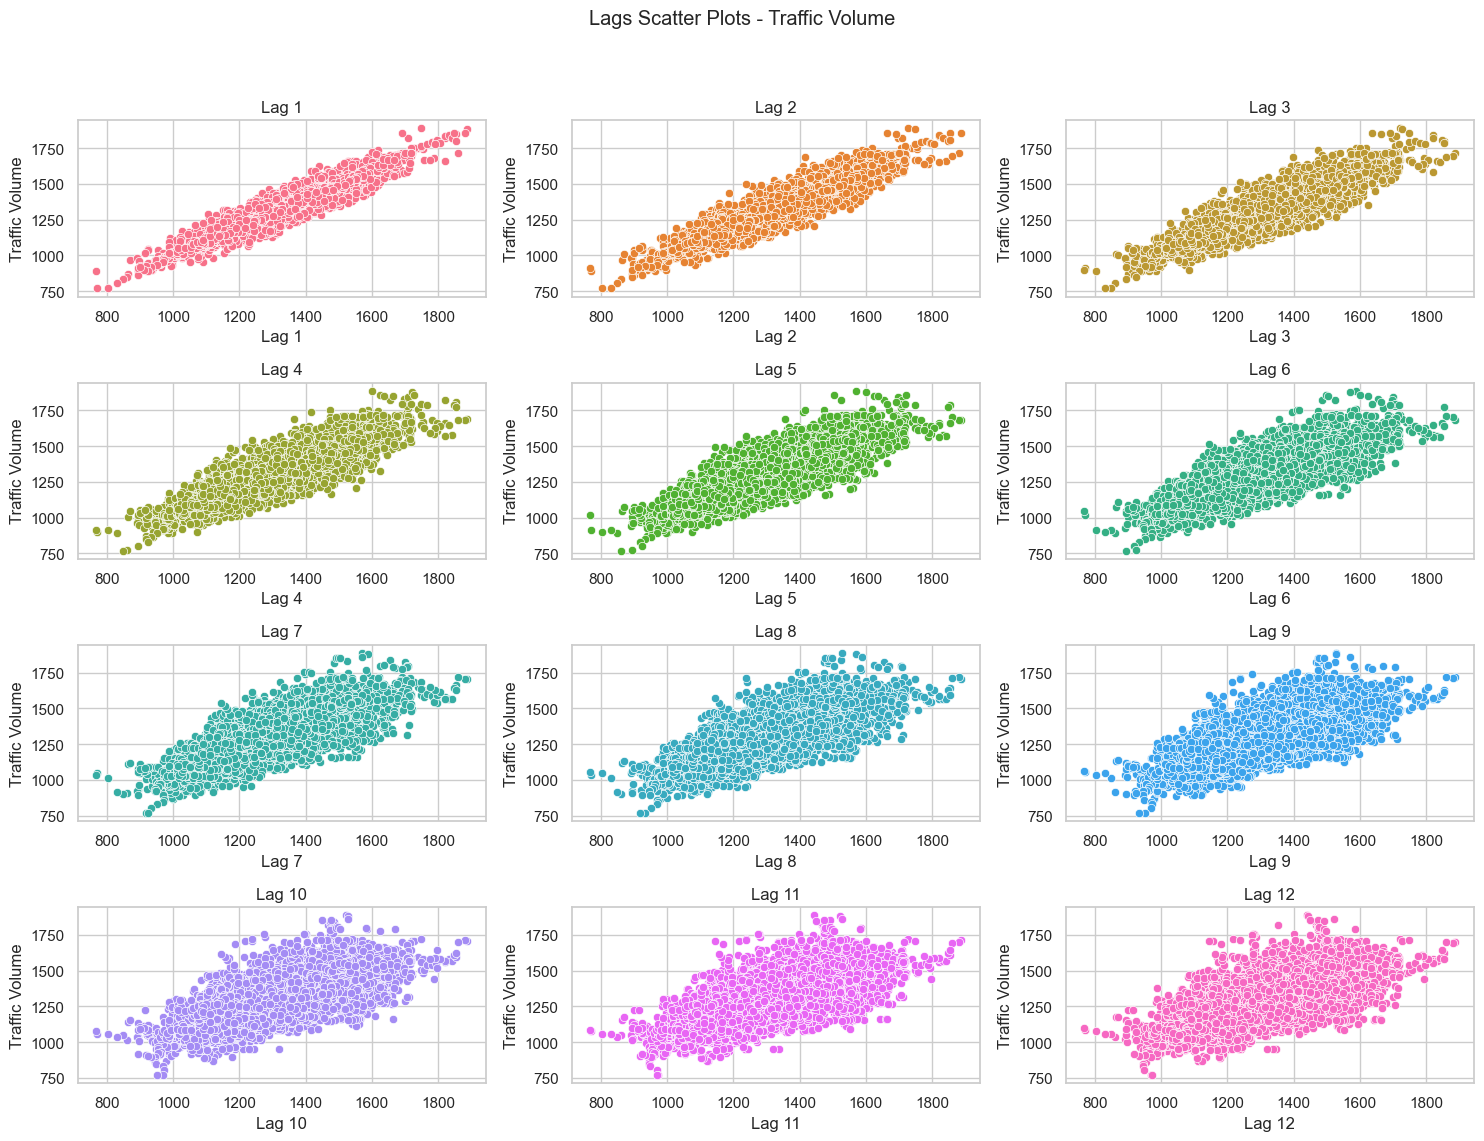

In [21]:
lags = 12
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Lags Scatter Plots - Traffic Volume')

for i in range(1, lags + 1):
    ax = axs[(i-1)//3, (i-1)%3]
    df[f'lag_{i}'] = df['Traffic Volume'].shift(i)
    sns.scatterplot(
        x=df[f'lag_{i}'], 
        y=df['Traffic Volume'], 
        ax=ax,
        color=sns.color_palette("husl", lags)[i-1]
    )
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'Lag {i}')
    ax.set_ylabel('Traffic Volume')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()